#**Assignment 1: Multi-layer perceptron**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

##**Data**

Data: CIFAR-10

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 **color images** containing one of 10 object classes, with 6000 images per class.

Labels are as follows:

airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), truck (9)

Source: https://www.kaggle.com/c/cifar-10

### Q1. This dataset has been included in **keras.datasets.cifar10**. Please load the dataset and print the shape of training and testing sets.

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (50000, 32, 32, 3) (50000, 1)
Testing set shape: (10000, 32, 32, 3) (10000, 1)


### Q2. Show the first 9 instances of the training dataset.

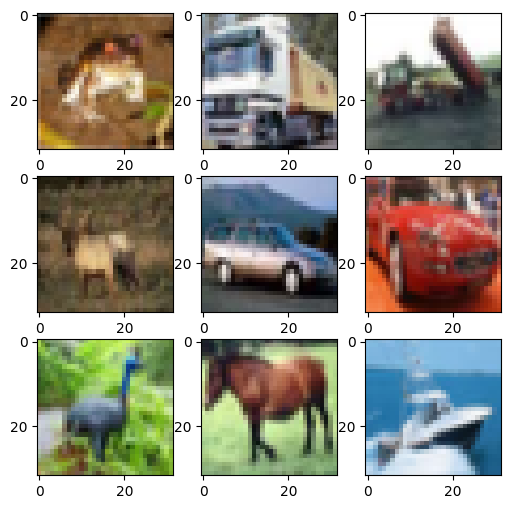

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], interpolation='nearest')
    plt.grid(False)
    plt.xticks([0, 20])
    plt.yticks([0, 20])
plt.show()

### Q3. Convert the target labels (y) into the one-hot format and show the value (y) for the first instance of the training dataset.

In [4]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
print("one-hot encoded label for the first instance is:", y_train_one_hot[0])

one-hot encoded label for the first instance is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Q4. Create a validation dataset using the first 5,000 instances in the training dataset. Also, divide all input features (X values) in the train/test/validation sets by 255.0. Please show the y value for the first instance of the validation dataset.

In [5]:
X_val = X_train[:5000] / 255.0
y_val = y_train_one_hot[:5000]
X_train = X_train[5000:] / 255.0
y_train_one_hot = y_train_one_hot[5000:]
X_test = X_test / 255.0

print("y_valid[0]:", y_val[0])

y_valid[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## **Model**

### Q5. Create a multi-layer perceptron model with 200 neurons in the first hidden layer and 100 neurons in the second hidden layer, and print the model summary.

### Please note that the input images are color images with the shape of **32 * 32 * 3**. Here 3 shows RGB.

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

/Users/nimeng/PycharmProjects/ISBA_2414/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,710 (2.43 MB)

 Trainable params: 635,710 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

### Q6. Create an Adam optimizer with a learning rate of 0.001, compile the model, and fit it on the training and validation datasets. Use the following hyperparameters: **batch_size=512, epochs=20**.

### *Hint*: Adam optimizer can be imported by **keras.optimizers.Adam(learning_rate=0.001)**



In [7]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_one_hot,
                    validation_data=(X_val, y_val),
                    batch_size=512,
                    epochs=20)


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2854 - loss: 1.9876 - val_accuracy: 0.3500 - val_loss: 1.8167
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3683 - loss: 1.7894 - val_accuracy: 0.3688 - val_loss: 1.7631
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3939 - loss: 1.7182 - val_accuracy: 0.3940 - val_loss: 1.6777
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4064 - loss: 1.6792 - val_accuracy: 0.4086 - val_loss: 1.6559
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4269 - loss: 1.6248 - val_accuracy: 0.4108 - val_loss: 1.6130
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4330 - loss: 1.5978 - val_accuracy: 0.4142 - val_loss: 1.6314
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4501 - loss: 1.5544 - val_accuracy: 0.4270 - val_loss: 1.5838
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4564 - loss: 1.5366 - val_accuracy: 0.4334 - val_loss

## **Performance**

### Q7. Evaluate your model.

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, keras.utils.to_categorical(y_test, 10))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.4951 - loss: 1.4251


### Q8. Show the predicted probabilities for the test dataset.

In [9]:
predicted_probabilities = model.predict(X_test)
print("Predicted probabilities for the test dataset:", predicted_probabilities.round(3))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
Predicted probabilities for the test dataset: [[0.019 0.034 0.186 ... 0.002 0.026 0.009]
 [0.022 0.291 0.002 ... 0.001 0.135 0.548]
 [0.203 0.224 0.004 ... 0.002 0.427 0.135]
 ...
 [0.003 0.001 0.201 ... 0.05  0.028 0.002]
 [0.022 0.011 0.168 ... 0.012 0.009 0.01 ]
 [0.052 0.007 0.138 ... 0.316 0.018 0.019]]


### Q9. Show the predicted labels for the test dataset.


In [10]:
predicted_labels = np.argmax(predicted_probabilities, axis=1)
print("Predicted labels for the test dataset:", predicted_labels)

Predicted labels for the test dataset: [3 9 8 ... 5 6 4]


### Q10. Show the confusion matrix.


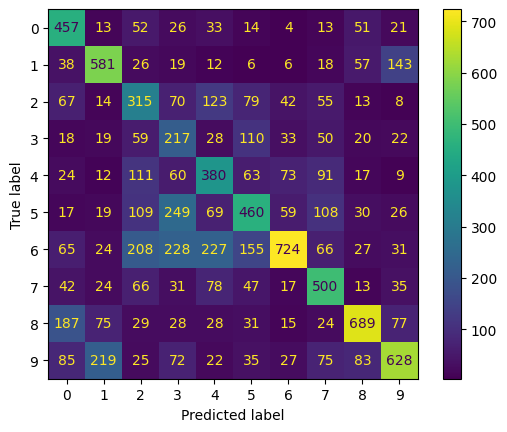

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(predicted_labels, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()

## **Post-analysis**

### Q11. Plot the loss and accuracy for the training and validation sets.


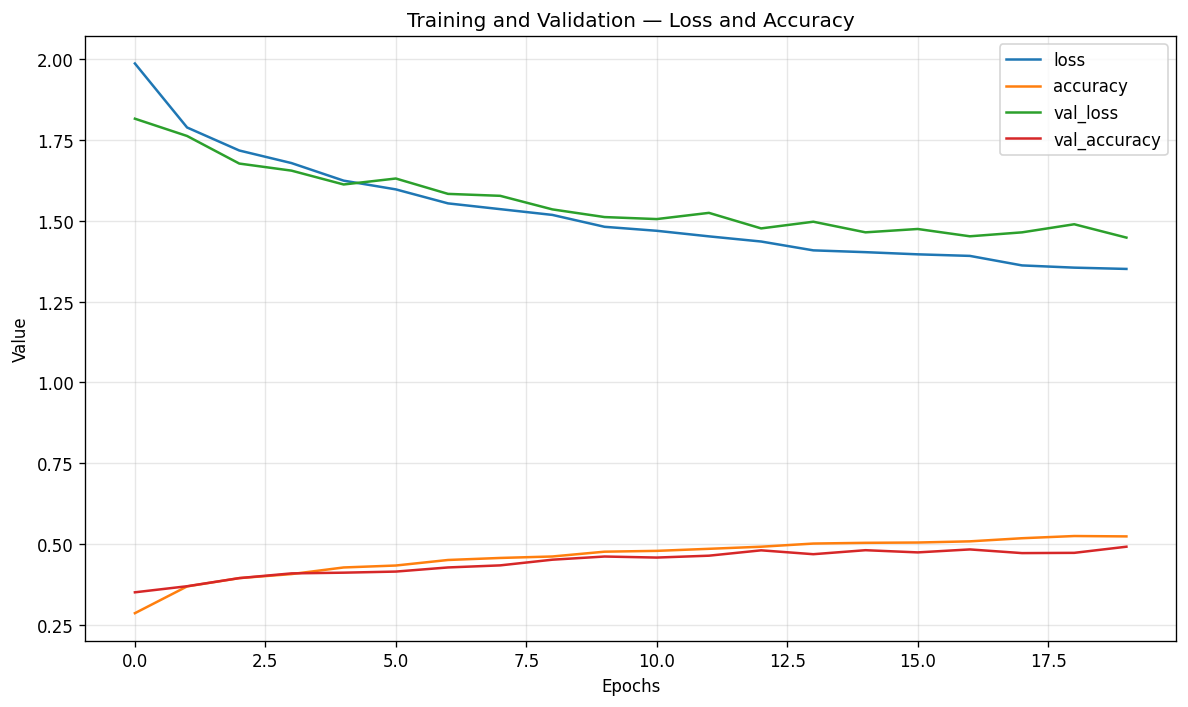

In [12]:
plt.figure(figsize=(10,6), dpi=120)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')


plt.title('Training and Validation — Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Q12. Show the first 9 images that the actual value is different from the predicted value.

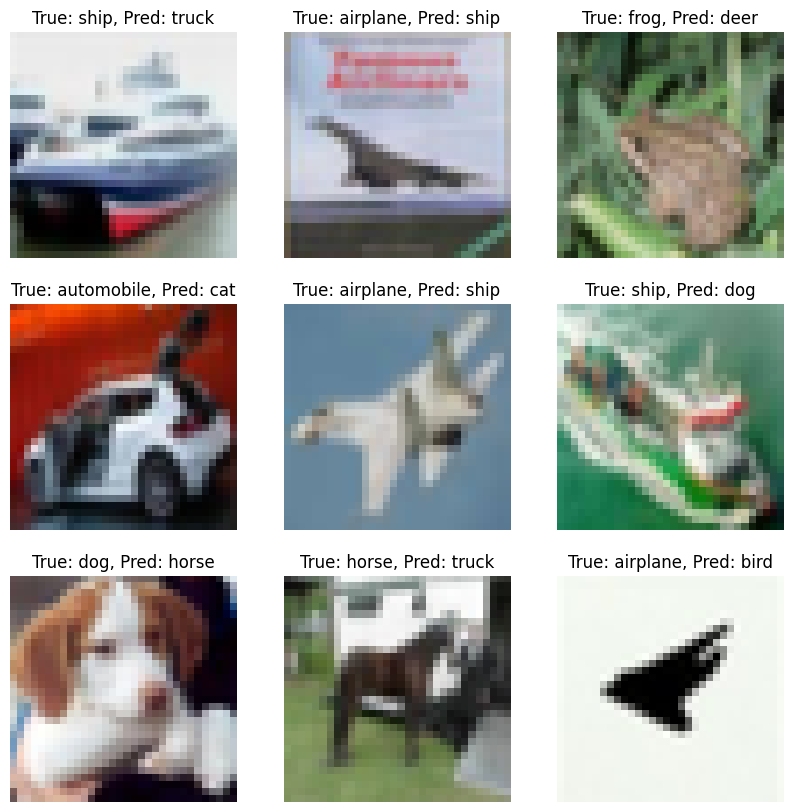

In [13]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
incorrect_indices = np.where(y_test.flatten() != predicted_labels)[0]

plt.figure(figsize=(10,10))
for i, index in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[index])
    true_label = label_names[y_test[index][0]]
    pred_label = label_names[predicted_labels[index]]
    plt.title(f'True: {true_label}, Pred: {pred_label}')
    plt.axis('off')
plt.show()
